# Crypto Clustering

In [1]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [62]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
origin_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
origin_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics

# Use the describe method to generate summary statistics, then round the output to four decimal places
summary_stats = origin_data_df.describe().round(2)

# Display the rounded summary statistics
display(summary_stats)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.00,41.00,41.00,41.00,41.00,41.00,41.00
mean,-0.27,4.50,0.19,1.55,-0.09,236.54,347.67
std,2.69,6.38,8.38,26.34,47.37,435.23,1247.84
min,-13.53,-6.09,-18.16,-34.71,-44.82,-0.39,-17.57
25%,-0.61,0.05,-5.03,-10.44,-25.91,21.66,0.41
50%,-0.06,3.30,0.11,-0.04,-7.54,83.91,69.69
75%,0.61,7.60,5.51,4.58,0.66,216.18,168.37
max,4.84,20.69,24.24,140.80,223.06,2227.93,7852.09


# QUESTION FOR OFFICE HOURS

In [4]:
# EXTRA - not a required part of challenge.
# Build a way to check for null values and show data types, in same table.

In [5]:
# Create dictionary to hold null value counts
null_value_counts = {}

for i in origin_data_df.columns:
    null_value_counts[i] = origin_data_df[i].isna().sum()
# null_value_counts

# Create dictionary to hold data_types
data_types = {}

for i in origin_data_df.columns:
    data_types[i] = origin_data_df[i].dtype
# data_types

# Merge dictionaries
null_and_types_df = {}  
null_and_types_df = pd.DataFrame({'Null Values': null_value_counts, 'Data Types': data_types})

# Reset index and rename column
null_and_types_df = null_and_types_df.reset_index()
null_and_types_df = null_and_types_df.rename(columns={'index': 'Column Name'})

null_and_types_df

,Column Name,Null Values,Data Types
0,price_change_percentage_24h,0,float64
1,price_change_percentage_7d,0,float64
2,price_change_percentage_14d,0,float64
3,price_change_percentage_30d,0,float64
4,price_change_percentage_60d,0,float64
5,price_change_percentage_200d,0,float64
6,price_change_percentage_1y,0,float64


In [6]:
# Convert the values in column 'Column Name' to a list of strings formatted for StandardScaler function.
string_list = ['"' + str(x) + '"' for x in null_and_types_df['Column Name'].tolist()]

# Join the list elements with commas to create the final string
result = ', '.join(string_list)

result

'"price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"'

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data_array = StandardScaler().fit_transform(origin_data_df[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

# Display sample data
scaled_data_array[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [8]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(data=scaled_data_array, index=None, columns=None, dtype=None, copy=False)

# Set index of scaled_data_df to be crypto names (index) from the original data
scaled_data_df['coin_id'] = origin_data_df.index

# Set the coinid column as index
scaled_data_df.set_index('coin_id', inplace=True)

# Display sample data
print(scaled_data_df.head(41))

                             0         1         2         3         4  \
coin_id                                                                  
bitcoin               0.508529  0.493193  0.772200  0.235460 -0.067495   
ethereum              0.185446  0.934445  0.558692 -0.054341 -0.273483   
tether                0.021774 -0.706337 -0.021680 -0.061030  0.008005   
ripple               -0.040764 -0.810928  0.249458 -0.050388 -0.373164   
bitcoin-cash          1.193036  2.000959  1.760610  0.545842 -0.291203   
binancecoin           0.891871  1.327295  0.800214 -0.057148  0.778653   
chainlink             0.011397  2.572251  1.101647 -0.490495 -0.931954   
cardano               0.102530  1.508001  0.648885  0.328959 -0.486349   
litecoin              0.077497  0.334297  0.858520 -0.012646 -0.366477   
bitcoin-cash-sv       0.448952 -0.190684 -0.248043  0.051634 -0.529666   
crypto-com-chain      0.331280 -1.614844 -1.054521 -0.729931 -0.350155   
usd-coin              0.034352 -0.7330

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)  # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model.fit(scaled_data_df)  # 2. Fit the model to the data using the scaled DataFrame
    inertia.append(k_model.inertia_)  # 3. Append the model.inertia_ to the inertia list

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [10]:
# EXTRA - not a required part of challenge.
# Add inertia_change column to see magnitude of change in inertia with each new value of k
df_elbow_with_change = df_elbow.copy()
df_elbow_with_change['inertia_change'] = (df_elbow['inertia'] - df_elbow['inertia'].shift(1)) / df_elbow['inertia'].shift(1) * 100
df_elbow_with_change = df_elbow_with_change.style.format({'inertia_%_change': "{:.3}"})

# Display the DataFrame
df_elbow_with_change

,k,inertia,inertia_change
0,1,287.000000,nan
1,2,212.123342,-26.089428
2,3,165.136752,-22.150598
3,4,79.022435,-52.147275
4,5,66.413051,-15.956715
5,6,61.634088,-7.195819
6,7,46.074467,-25.245154
7,8,43.392694,-5.820519
8,9,32.913223,-24.150313
9,10,30.469111,-7.425925


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

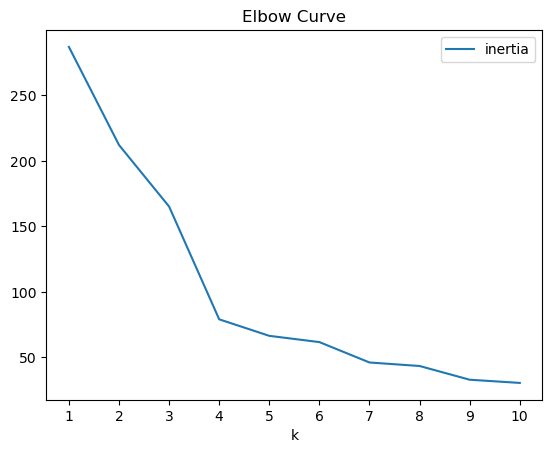

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k", 
    y= "inertia", 
    title="Elbow Curve", 
    xticks=k
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  Seems to be, quite clearly, 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(scaled_data_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_lower = model.predict(scaled_data_df)

# View the resulting array of cluster values.
k_lower

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [20]:
# Create a copy of the DataFrame
scaled_data_df_predictions = scaled_data_df.copy()

In [21]:
# Add a new column to the DataFrame with the predicted clusters
scaled_data_df_predictions['clusters_lower'] = k_lower

# Rename columns
scaled_data_df_predictions = scaled_data_df_predictions.rename(columns={0: '24h', 1: '7d', 2: '14d', 3: '30d', 4: '60d', 5: '200d', 6: '1y'})

# Display sample data
scaled_data_df_predictions 


,24h,7d,14d,30d,60d,200d,1y,clusters_lower
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


<Axes: xlabel='24h', ylabel='1y'>

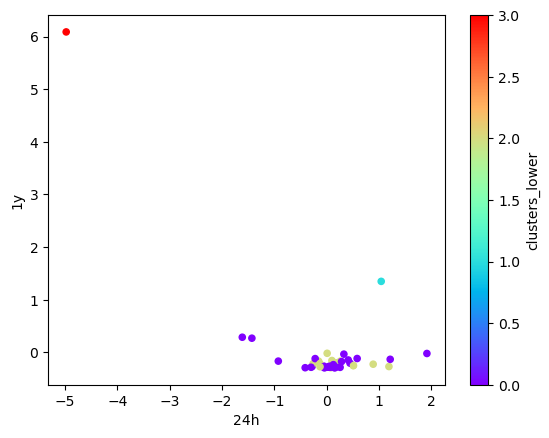

In [22]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_data_df_predictions.plot.scatter(
    x='24h',
    y='1y',
    c="clusters_lower",
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

PCA REDUCES THE NUMBER OF DIMENSIONS IN A DATASET 
PCA transforms a set of POSSIBLY CORRELATED variables into a set of LINEARLY UNCORRELATED variables, called principal components.  
The purpose of PCA is to reduce the number of variables in a dataset, WHILE PRESERVING, as much as possible, the original relationships between the variables.  

MATH CONCEPTS APPLIED IN PCA
Covariance Matrix - PCA starts by computing the covariance matrix of the data.  This matrix helps describe how the variables in the data are related or change together.  
Eigenvectors -  determine the directions of the new feature space. Eigenvalues represent the amount of variance captured by each principal component.
Eigenvalues - determine the magnitude of the new feature space.  Eigenvectors are orthogonal to each other and represent the principal components. 
Transformation - The original data points are then projected onto these principal components to get new data points.  

SUMMARY
Principal components are ordered by the amount of original variance they capture.  By selecting a subset of the original components (features), you can reduce the number of dimensions in the dataset while retaining the components (features) that capture the most variance in the original data.

In [23]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [30]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_data_df_predictions)

# View the first five rows of the DataFrame. 
pca_data[:5]

array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [28]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.34871677, 0.31363391, 0.22627118])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance = sum of the three variance ratios: 88.86%

In [54]:
# Create a new DataFrame with the PCA data.
pca_data = pd.DataFrame(pca_data, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
index_values = origin_data_df.index

# Set the coinid column as index
pca_data.index = index_values

# Display sample data
pca_data 

NameError: name 'pca_components_' is not defined

### Find the Best Value for k Using the PCA Data

In [32]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_PCA = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_PCA = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_PCA:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)  # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model.fit(pca_data)  # 2. Fit the model to the data using the scaled DataFrame
    inertia_PCA.append(k_model.inertia_)  # 3. Append the model.inertia_ to the inertia list

# Create a dictionary with the data to plot the Elbow curve
elbow_data_PCA = {"k": k_PCA, "inertia": inertia_PCA}

# Create a DataFrame with the data to plot the Elbow curve
elbow_PCA_df = pd.DataFrame(elbow_data_PCA)

# Display the DataFrame
elbow_PCA_df

,k,inertia
0,1,290.622694
1,2,207.307439
2,3,123.126951
3,4,44.130602
4,5,33.217427
5,6,23.374713
6,7,20.943077
7,8,18.666961
8,9,13.640110
9,10,10.287149


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

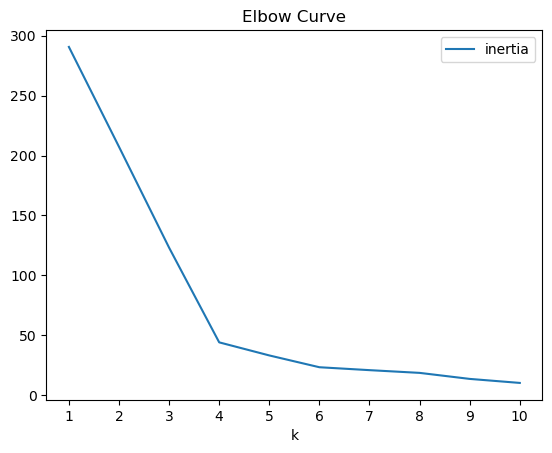

In [33]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_PCA_df.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not! The best k value from the original data was, also, 4. However, the change in slope at 4 features, for PCA, is greater than the change in slope at 4 from the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [37]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [38]:
# Fit the K-Means model using the PCA data
model.fit(pca_data)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [39]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_lower = model.predict(pca_data)

# Print the resulting array of cluster values.
k_lower

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [41]:
# Create a copy of the DataFrame with the PCA data
pca_data_copy= pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_copy["clusters_lower"] = k_lower

# Display sample data
pca_data_copy.head(5)

,PCA1,PCA2,PCA3,clusters_lower
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

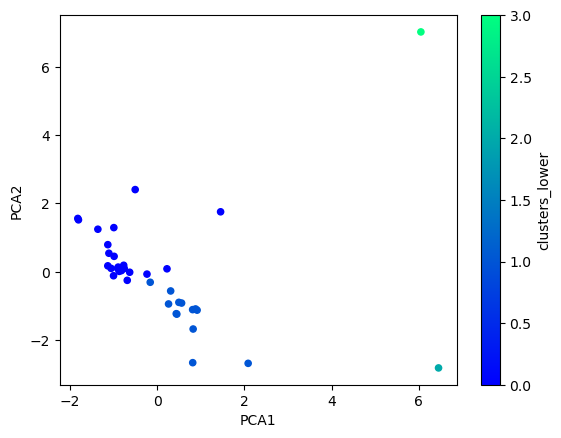

In [43]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_data_copy.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="clusters_lower",
    colormap='winter')

### Determine the Weights of Each Feature on each Principal Component

In [50]:
origin_data_df.shape

(41, 7)

In [56]:
scaled_data_df_predictions.shape

(41, 8)

In [58]:
pca_components = pca.components_
pca_components.shape

(3, 8)

In [60]:
# Use the columns from the original scaled DataFrame as the index.
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. FYI: The data has already been scaled and fitted.
pca_component_weights = pd.DataFrame(pca_components.T, columns=['PCA1', 'PCA2', 'PCA3'], index=scaled_data_df_predictions.columns)
pca_component_weights

# Adjust the columns parameter to match the number of principal components
# pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=cc_df_clean.columns)



# origin_data_df



,PCA1,PCA2,PCA3
24h,-0.219011,-0.499630,0.181473
7d,0.178767,-0.319433,-0.546037
14d,0.297589,-0.483024,-0.081269
30d,0.361440,-0.342065,0.370361
60d,0.368955,-0.148288,0.500222
200d,0.493587,0.294811,0.123208
1y,0.431207,0.410509,-0.075030
clusters_lower,0.367672,-0.143495,-0.504090


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

PCA1:  200d feature has a strong negative influence on the first principal component, at 0.5.  The 24h feature has a negative influence on PCA1, at -0.22.

PCA2:  24h feature has the strongest negative influence on PCA2, at -0.5, with 14d feature nearly as strong at -0.48.  In the positive direction, the 200d feature has a strong positive influence on PCA2, at 0.29.

PCA3: 60d feature has the strongest positive influence on PCA3, at 0.5. 7d counters the strong positive influence on PCA3, at -0.54.